<a href="https://colab.research.google.com/github/Tong-Zhong/Sentiment_Analysis_with_spacy/blob/main/2008_JNJ_Q4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

掛接雲端硬碟

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#前置作業

In [ ]:
#設定--不顯示python輸出的警告
import warnings #有關python輸出的警告
warnings.filterwarnings("ignore") #不顯示python輸出的警告
#warnings.filterwarnings("always") #顯示python輸出的警告

In [ ]:
# Colab 進行matplotlib繪圖時顯示繁體中文
# 下載台北思源黑體並命名taipei_sans_tc_beta.ttf，移至指定路徑
!wget -O TaipeiSansTCBeta-Regular.ttf https://drive.google.com/uc?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_&export=download

import matplotlib as mpl
import matplotlib.pyplot as plt 
from matplotlib.font_manager import fontManager

# 改style要在改font之前
# plt.style.use('seaborn')  

fontManager.addfont('TaipeiSansTCBeta-Regular.ttf')
mpl.rc('font', family='Taipei Sans TC Beta')

--2023-01-01 18:31:49--  https://drive.google.com/uc?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_
Resolving drive.google.com (drive.google.com)... 74.125.137.101, 74.125.137.100, 74.125.137.139, ...
Connecting to drive.google.com (drive.google.com)|74.125.137.101|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-0k-9o-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/idufbmkkm64n3l05m9cpqvpf6p16pkkk/1672597875000/02847987870453524430/*/1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_?uuid=f25b5dfb-bbf2-4a87-95d5-b1a614bc24cf [following]
--2023-01-01 18:31:50--  https://doc-0k-9o-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/idufbmkkm64n3l05m9cpqvpf6p16pkkk/1672597875000/02847987870453524430/*/1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_?uuid=f25b5dfb-bbf2-4a87-95d5-b1a614bc24cf
Resolving doc-0k-9o-docs.googleusercontent.com (doc-0k-9o-docs.googleusercontent.com)... 142.250.141.132, 2607:f8b0:4023:c0b::84
Connecting to doc-0

In [ ]:
!pip install spacytextblob

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
#匯入套件
import numpy as np
import pandas as pd
import spacy
from spacy import displacy
from spacytextblob.spacytextblob import SpacyTextBlob
nlp = spacy.load("en_core_web_sm")
nlp.add_pipe('spacytextblob')

#斷詞、斷句分析

##斷詞

In [ ]:
with open('/content/drive/MyDrive/大數據專題/08年/JNJ_2008_Q4_20090120發布.txt') as f :
  text = f.readlines()
text = ' '.join(text)
# text

In [ ]:
#將資料print出來 (這邊可跑可不跑)
# doc = nlp(text)
# for token in doc:
#   print(f'{token.i}  {token.text}  {token._.polarity}  {token._.subjectivity}  {spacy.explain(token.pos_)}  {spacy.explain(token.dep_)}  {spacy.explain(token.tag_)}  {token.is_alpha}  {token.is_stop}  {token.is_punct}  {token.like_num}')

#token.i index
#token.text 單字
#token._.polarity 極性
#token._.subjectivity 主觀性
#spacy.explain(token.pos_) 詞性
#spacy.explain(token.dep_) 詞在句子中的定位
#token.is_alpha 是否為全字母
#token.is_stop 是否為停用詞
#token.is_punct 是否為標點符號
#token.like_num 是否為數字

In [ ]:
#建成DataFrame
doc = nlp(text)
cols = ("Word", "Polarity", "Subjectivity","Pos_", "Dep_", "Alpha", "Stopword", "Punct", "Num")
rows = []
for token in doc:    
    row = [token.text, token._.polarity, token._.subjectivity, spacy.explain(token.pos_),   spacy.explain(token.dep_) ,token.is_alpha, token.is_stop, token.is_punct, token.like_num]    
    rows.append(row)
df = pd.DataFrame(rows, columns=cols)
df

,Word,Polarity,Subjectivity,Pos_,Dep_,Alpha,Stopword,Punct,Num
0,Johnson,0.0,0.0,proper noun,nominal subject,True,False,False,False
1,&,0.0,0.0,coordinating conjunction,coordinating conjunction,False,False,True,False
2,Johnson,0.0,0.0,proper noun,conjunct,True,False,False,False
3,(,0.0,0.0,punctuation,punctuation,False,False,True,False
4,NYSE,0.0,0.0,proper noun,appositional modifier,True,False,False,False
...,...,...,...,...,...,...,...,...,...
17255,’ll,0.0,0.0,auxiliary,auxiliary,False,True,False,False
17256,see,0.0,0.0,verb,conjunct,True,True,False,False
17257,you,0.0,0.0,pronoun,direct object,True,True,False,False
17258,later,0.0,0.0,adverb,adverbial modifier,True,False,False,False


In [ ]:
#查看資料
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17260 entries, 0 to 17259
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Word          17260 non-null  object 
 1   Polarity      17260 non-null  float64
 2   Subjectivity  17260 non-null  float64
 3   Pos_          17260 non-null  object 
 4   Dep_          17255 non-null  object 
 5   Alpha         17260 non-null  bool   
 6   Stopword      17260 non-null  bool   
 7   Punct         17260 non-null  bool   
 8   Num           17260 non-null  bool   
dtypes: bool(4), float64(2), object(3)
memory usage: 741.8+ KB


In [ ]:
# 將stopword、punct、num=True，以及Alpha=False的字刪除
df.drop(df[(df.Alpha == False)|(df.Stopword == True)|(df.Punct == True)|(df.Num == True)].index , inplace=True)
df

,Word,Polarity,Subjectivity,Pos_,Dep_,Alpha,Stopword,Punct,Num
0,Johnson,0.0,0.0,proper noun,nominal subject,True,False,False,False
2,Johnson,0.0,0.0,proper noun,conjunct,True,False,False,False
4,NYSE,0.0,0.0,proper noun,appositional modifier,True,False,False,False
6,JNJ,0.0,0.0,proper noun,modifier of nominal,True,False,False,False
10,Earnings,0.0,0.0,noun,compound,True,False,False,False
...,...,...,...,...,...,...,...,...,...
17243,feel,0.0,0.0,verb,clausal complement,True,False,False,False
17245,optimistic,0.0,0.0,adjective,adjectival complement,True,False,False,False
17248,year,0.0,0.0,noun,object of preposition,True,False,False,False
17250,Thanks,0.2,0.2,noun,root,True,False,False,False


**Pos_被刪除的詞性涵義：**
* proper noun(專有名詞)
* adposition(同位語on, in, for, towards)
* auxiliary(助動詞 is、will do)
* coordinating conjunction(並列連詞for、and)
* numeral(數字)
* pronoun(代詞)
* subordinating conjunction(從屬連詞because、when)

In [ ]:
#將'Pos_'的'proper noun','adposition' ,'auxiliary', 'coordinating conjunction', 'numeral', 'pronoun', 'subordinating conjunction'刪除
df.drop(df[df['Pos_'].isin(['proper noun','adposition' ,'auxiliary', 'coordinating conjunction', 'numeral', 'pronoun', 'subordinating conjunction'])].index , inplace=True)
df

,Word,Polarity,Subjectivity,Pos_,Dep_,Alpha,Stopword,Punct,Num
10,Earnings,0.0,0.0,noun,compound,True,False,False,False
99,pleasure,0.0,0.0,noun,attribute,True,False,False,False
101,morning,0.0,0.0,noun,noun phrase as adverbial modifier,True,False,False,False
103,review,0.0,0.0,verb,open clausal complement,True,False,False,False
105,business,0.0,0.0,noun,compound,True,False,False,False
...,...,...,...,...,...,...,...,...,...
17243,feel,0.0,0.0,verb,clausal complement,True,False,False,False
17245,optimistic,0.0,0.0,adjective,adjectival complement,True,False,False,False
17248,year,0.0,0.0,noun,object of preposition,True,False,False,False
17250,Thanks,0.2,0.2,noun,root,True,False,False,False


In [ ]:
#將Dep_的'auxiliary (passive)', 'coordinating conjunction', 'clausal subject', 'complement of preposition', 'compound', 'conjunct', 'nominal subject',
#'open clausal complement','punctuation','modifier of quantifier'刪除
df.drop(df[df['Dep_'].isin(['auxiliary (passive)', 'coordinating conjunction', 'clausal subject', 'complement of preposition', 'compound', 'conjunct', 'nominal subject',
'open clausal complement', 'punctuation','modifier of quantifier', 'object of preposition', 'attribute',  'modifier of nominal', 'prepositional modifier', 'appositional modifier', 
'possession modifier', 'nominal subject (passive)', 'punctuation', 'dative', 'numeric modifier' ])].index , inplace=True)
df

,Word,Polarity,Subjectivity,Pos_,Dep_,Alpha,Stopword,Punct,Num
101,morning,0.0,0.0,noun,noun phrase as adverbial modifier,True,False,False,False
106,results,0.0,0.0,noun,direct object,True,False,False,False
123,today,0.0,0.0,noun,noun phrase as adverbial modifier,True,False,False,False
164,logistics,0.0,0.0,noun,noun phrase as adverbial modifier,True,False,False,False
182,available,0.4,0.4,adjective,object predicate,True,False,False,False
...,...,...,...,...,...,...,...,...,...
17241,makes,0.0,0.0,verb,clausal complement,True,False,False,False
17243,feel,0.0,0.0,verb,clausal complement,True,False,False,False
17245,optimistic,0.0,0.0,adjective,adjectival complement,True,False,False,False
17250,Thanks,0.2,0.2,noun,root,True,False,False,False


In [ ]:
#將'Pos_'&'Dep_'共同條件的['coordinating conjunction', 'coordinating conjunction'] ,['noun', 'direct object'] ,['verb', 'direct object'] ,['noun','adverbial clause modifier'] 
#['verb', 'adverbial clause modifier'],['verb' ,'clausal complement'] ,['noun' ,'clausal complement'] ,['verb', 'relative clause modifier'] ,['noun', 'noun phrase as adverbial modifier'],
#['verb', 'clausal subject'] ,['interjection', 'interjection'] ,['verb','root'] ,['noun','root'] 刪除
df.drop(df[(df.Pos_ == 'coordinating conjunction') & (df.Dep_ == 'coordinating conjunction') | (df.Pos_ == 'noun') & (df.Dep_ == 'direct object') | 
(df.Pos_ == 'verb') & (df.Dep_ == 'direct object') | (df.Pos_ == 'noun') & (df.Dep_ == 'adverbial clause modifier') |
(df.Pos_ == 'verb') & (df.Dep_ == 'adverbial clause modifier') | (df.Pos_ == 'verb') & (df.Dep_ == 'clausal complement') |
(df.Pos_ == 'noun') & (df.Dep_ == 'clausal complement') | (df.Pos_ == 'verb') & (df.Dep_ == 'relative clause modifier')|
(df.Pos_ == 'noun') & (df.Dep_ == 'noun phrase as adverbial modifier') | (df.Pos_ == 'verb') & (df.Dep_ == 'clausal subject')|
(df.Pos_ == 'interjection') & (df.Dep_ == 'interjection') | (df.Pos_ == 'verb') & (df.Dep_ == 'root') | (df.Pos_ == 'noun') & (df.Dep_ == 'root') ].index , inplace=True)
df

,Word,Polarity,Subjectivity,Pos_,Dep_,Alpha,Stopword,Punct,Num
182,available,0.400000,0.400000,adjective,object predicate,True,False,False,False
185,broader,0.000000,0.000000,adjective,adjectival modifier,True,False,False,False
189,webcast,0.000000,0.000000,noun,adjectival modifier,True,False,False,False
207,briefly,0.000000,0.333333,adverb,adverbial modifier,True,False,False,False
240,strategic,0.000000,0.000000,adjective,adjectival modifier,True,False,False,False
...,...,...,...,...,...,...,...,...,...
17201,strong,0.433333,0.733333,adjective,adjectival modifier,True,False,False,False
17219,strong,0.433333,0.733333,adjective,adjectival modifier,True,False,False,False
17236,committed,0.000000,0.000000,adjective,adjectival complement,True,False,False,False
17245,optimistic,0.000000,0.000000,adjective,adjectival complement,True,False,False,False


In [ ]:
#查看'Polarity'描述
df['Polarity'].describe()

count    1434.000000
mean        0.063096
std         0.212209
min        -0.714286
25%         0.000000
50%         0.000000
75%         0.100000
max         1.000000
Name: Polarity, dtype: float64

In [ ]:
#查看'Subjectivity'描述
df['Subjectivity'].describe()

count    1434.000000
mean        0.267704
std         0.334144
min         0.000000
25%         0.000000
50%         0.000000
75%         0.500000
max         1.000000
Name: Subjectivity, dtype: float64

In [ ]:
#為'Polarity'定義'Positive'、'Neutral'、'Negative'，放在'Sentiment'欄位
def getSentiment(score):
  if score > 0:
    return 'Positive'
  elif score == 0:
    return 'Neutral'
  else:
    return 'Negative'
df['Sentiment'] = df['Polarity'].apply(getSentiment)

In [ ]:
#為'Subjectivity'定義'Subjective'、'Objective',放在'Opinion'欄位
def getOpinion(_score):
  if _score > 0:
    return 'Subjective'
  elif _score == 0:
    return 'Objective'
df['Opinion'] = df['Subjectivity'].apply(getOpinion)

In [ ]:
#查看資料表
df

,Word,Polarity,Subjectivity,Pos_,Dep_,Alpha,Stopword,Punct,Num,Sentiment,Opinion
182,available,0.400000,0.400000,adjective,object predicate,True,False,False,False,Positive,Subjective
185,broader,0.000000,0.000000,adjective,adjectival modifier,True,False,False,False,Neutral,Objective
189,webcast,0.000000,0.000000,noun,adjectival modifier,True,False,False,False,Neutral,Objective
207,briefly,0.000000,0.333333,adverb,adverbial modifier,True,False,False,False,Neutral,Subjective
240,strategic,0.000000,0.000000,adjective,adjectival modifier,True,False,False,False,Neutral,Objective
...,...,...,...,...,...,...,...,...,...,...,...
17201,strong,0.433333,0.733333,adjective,adjectival modifier,True,False,False,False,Positive,Subjective
17219,strong,0.433333,0.733333,adjective,adjectival modifier,True,False,False,False,Positive,Subjective
17236,committed,0.000000,0.000000,adjective,adjectival complement,True,False,False,False,Neutral,Objective
17245,optimistic,0.000000,0.000000,adjective,adjectival complement,True,False,False,False,Neutral,Objective


In [ ]:
#將"Sentiment"與"Opinion"做為一群，看總數
total_count = df.groupby(["Sentiment", "Opinion"]).size().reset_index(name="總數")
total_count

,Sentiment,Opinion,總數
0,Negative,Objective,1
1,Negative,Subjective,137
2,Neutral,Objective,758
3,Neutral,Subjective,142
4,Positive,Subjective,396


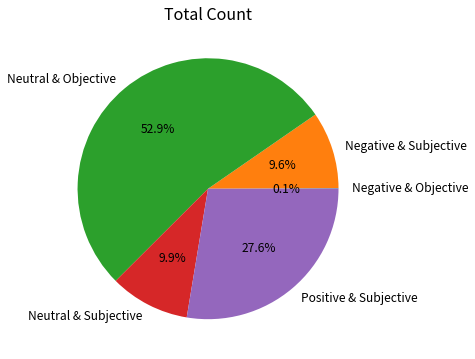

In [ ]:
#將資料畫成圓餅圖查看
import matplotlib.pyplot as plt
size = total_count["總數"].values
label = ["Negative & Objective", "Negative & Subjective", "Neutral & Objective", "Neutral & Subjective", "Positive & Subjective"]
plt.figure(figsize=(20,6))
plt.pie(size,                           # 數值
        labels = label,                # 標籤
        autopct = "%1.1f%%",            # 將數值百分比並留到小數點一位
        pctdistance = 0.6,              # 數字距圓心的距離
        textprops = {"fontsize" : 12},  # 文字大小
        shadow=False) 
plt.title("Total Count",fontsize = 16)
plt.show()

**AAPL_Q1 斷詞分析由 Neutral & Objective占多數**

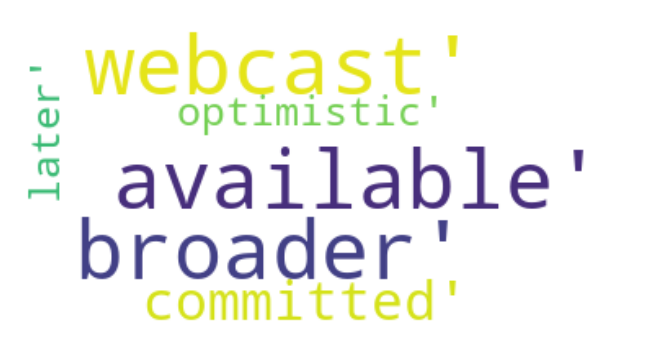

In [ ]:
#文字雲
import matplotlib.pyplot as plt
from wordcloud import WordCloud, ImageColorGenerator
# Create and generate a word cloud image:
kl = df["Word"].values
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(str(kl))
plt.figure(figsize=(20,6))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

##斷句

In [ ]:
#看polarity、subjectivity、assessments(可跑可不跑)
# ※assessments 後面DataFrame沒有

# _aapl_2021q1_path = '/content/drive/MyDrive/大數據專題/畢專/aapl_2021_01_27_Q1.txt'
# _aapl_2021q1_readfile = open(_aapl_2021q1_path).read()
# text = _aapl_2021q1_readfile
# doc = nlp(text)
# for sentence in doc.sents:
#   sentence_list.append(sentence)
#   print('句子',f'{sentence.text}  {sentence._.polarity}  {sentence._.subjectivity}'
#   ,'\n','依據',sentence._.blob.sentiment_assessments.assessments)

# doc._.polarity                          
# doc._.subjectivity                      
# doc._.blob.sentiment_assessments.assessments   # Assessments:評估polarity、subjectivity 的依據列表 
# doc._.blob.ngrams()  #計算字的出現頻率

In [ ]:
#建成DataFrame
# with open('/content/drive/MyDrive/大數據專題/畢專/aapl_2021_01_27_Q1.txt') as f :
#   text = f.read()
  
doc = nlp(text)

_cols = ("Sentence", "Polarity", "Subjectivity")
_rows = []
for _token in doc.sents:    
    _row = [_token.text, _token._.polarity, _token._.subjectivity] #_token._.blob.sentiment_assessments.assessments 
    _rows.append(_row)
_df = pd.DataFrame(_rows, columns=_cols)
_df

,Sentence,Polarity,Subjectivity
0,Johnson & Johnson (NYSE:JNJ) Q4 2008 Earnings ...,0.262500,0.362500
1,Joining me on the podium today are our host fo...,0.000000,0.000000
2,A few logistics before we get into the details...,0.191667,0.291667
3,I’ll begin by briefly reviewing highlights of ...,0.000000,0.166667
4,"Following my remarks, Bill Weldon will comment...",0.000000,0.100000
...,...,...,...
669,I know it’s a very important day for a lot of ...,0.520000,1.000000
670,I also want to say in parting that I was asked...,0.000000,0.500000
671,I want to tell you that the people at J&J look...,0.406000,0.797333
672,I want to let you all know that the people of ...,0.200000,0.300000


In [ ]:
#查看'Polarity'描述
_df['Polarity'].describe()

count    674.000000
mean       0.090516
std        0.188963
min       -0.575000
25%        0.000000
50%        0.000000
75%        0.199107
max        0.900000
Name: Polarity, dtype: float64

In [ ]:
#查看'Subjectivity'描述
_df['Subjectivity'].describe()

count    674.000000
mean       0.339073
std        0.270240
min        0.000000
25%        0.066667
50%        0.333333
75%        0.500000
max        1.000000
Name: Subjectivity, dtype: float64

In [ ]:
#為'Polarity'定義'Positive'、'Neutral'、'Negative'，放在'Sentiment'欄位
def getSentiment(score):
  if score > 0:
    return 'Positive'
  elif score == 0:
    return 'Neutral'
  else:
    return 'Negative'
_df['Sentiment'] = _df['Polarity'].apply(getSentiment)

In [ ]:
#為'Subjectivity'定義'Subjective'、'Objective'放在'Opinion'欄位
def getOpinion(_score):
  if _score > 0:
    return 'Subjective'
  elif _score == 0:
    return 'Objective'
_df['Opinion'] = _df['Subjectivity'].apply(getOpinion)

In [ ]:
#查看資料表
_df

,Sentence,Polarity,Subjectivity,Sentiment,Opinion
0,Johnson & Johnson (NYSE:JNJ) Q4 2008 Earnings ...,0.262500,0.362500,Positive,Subjective
1,Joining me on the podium today are our host fo...,0.000000,0.000000,Neutral,Objective
2,A few logistics before we get into the details...,0.191667,0.291667,Positive,Subjective
3,I’ll begin by briefly reviewing highlights of ...,0.000000,0.166667,Neutral,Subjective
4,"Following my remarks, Bill Weldon will comment...",0.000000,0.100000,Neutral,Subjective
...,...,...,...,...,...
669,I know it’s a very important day for a lot of ...,0.520000,1.000000,Positive,Subjective
670,I also want to say in parting that I was asked...,0.000000,0.500000,Neutral,Subjective
671,I want to tell you that the people at J&J look...,0.406000,0.797333,Positive,Subjective
672,I want to let you all know that the people of ...,0.200000,0.300000,Positive,Subjective


In [ ]:
#將"Sentiment"與"Opinion"做為一群，看總數
_total_count = _df.groupby(["Sentiment", "Opinion"]).size().reset_index(name="總數")
_total_count

,Sentiment,Opinion,總數
0,Negative,Subjective,123
1,Neutral,Objective,148
2,Neutral,Subjective,71
3,Positive,Subjective,332


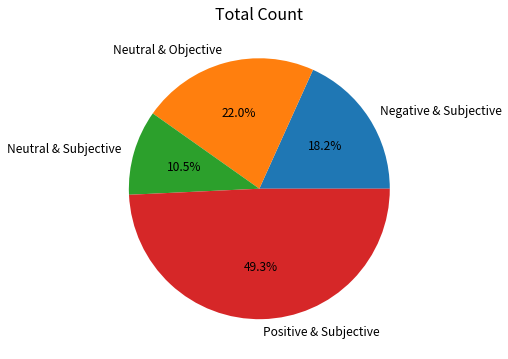

In [ ]:
#將資料畫成圓餅圖查看
import matplotlib.pyplot as plt
_size = _total_count["總數"].values
label = ["Negative & Subjective", "Neutral & Objective", "Neutral & Subjective", "Positive & Subjective"]
plt.figure(figsize=(20,6)) 
plt.pie(_size,                           # 數值
        labels = label,                # 標籤
        autopct = "%1.1f%%",            # 將數值百分比並留到小數點一位
        pctdistance = 0.6,              # 數字距圓心的距離
        textprops = {"fontsize" : 12},  # 文字大小
        shadow=False) 
plt.title("Total Count",fontsize = 16)
plt.show()

**AAPL_Q1 斷句分析由 Positive & Subjective占多數**

#查看句子

In [ ]:
#查看'Negative','Subjective'的句子
neg_sub_j=1
sorted = _df.sort_values(by=['Polarity','Subjectivity'],ascending=False)
for i in range(0, sorted.shape[0]):
  if(sorted['Sentiment'][i] == 'Negative') & (sorted['Opinion'][i] == 'Subjective'):
    print(str(neg_sub_j)+ ')' + sorted['Sentence'][i])
    print()
    neg_sub_j+=1

In [ ]:
#查看'Neutral','Objective'的句子
neu_ob_j=1
sorted = _df.sort_values(by=['Polarity','Subjectivity'],ascending=False)
for i in range(0, sorted.shape[0]):
  if(sorted['Sentiment'][i] == 'Neutral') & (sorted['Opinion'][i] == 'Objective'):
    print(str(neu_ob_j)+ ')' + sorted['Sentence'][i])
    print()
    neu_ob_j+=1

In [ ]:
#查看'Neutral','Subjective'的句子
neu_sub_j=1
sorted = _df.sort_values(by=['Polarity','Subjectivity'],ascending=False)
for i in range(0, sorted.shape[0]):
  if(sorted['Sentiment'][i] == 'Neutral') & (sorted['Opinion'][i] == 'Subjective'):
    print(str(neu_sub_j)+ ')' + sorted['Sentence'][i])
    print()
    neu_sub_j+=1

In [ ]:
#查看'Positive','Subjective'的句子
pos_sub_j=1
sorted = _df.sort_values(by=['Polarity','Subjectivity'],ascending=False)
for i in range(0, sorted.shape[0]):
  if(sorted['Sentiment'][i] == 'Positive') & (sorted['Opinion'][i] == 'Subjective'):
    print(str(pos_sub_j)+ ')' + sorted['Sentence'][i])
    print()
    pos_sub_j+=1

#結果


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

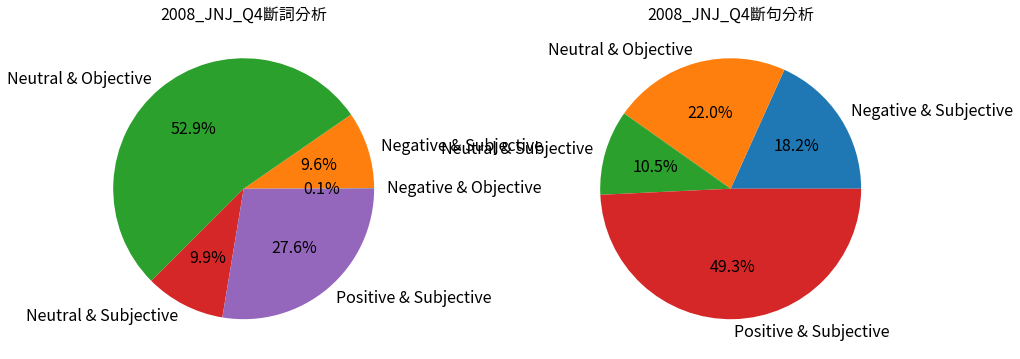

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(16,6))
size = total_count["總數"].values
_size = _total_count["總數"].values
label1 = ["Negative & Subjective", "Neutral & Objective", "Neutral & Subjective", "Positive & Subjective"]
label2 = ["Negative & Objective", "Negative & Subjective", "Neutral & Objective", "Neutral & Subjective", "Positive & Subjective"]



axs[0].pie(size, labels=label2, autopct='%1.1f%%', pctdistance = 0.6,              # 數字距圓心的距離
        textprops = {"fontsize" : 16} )
axs[0].set_title('2008_JNJ_Q4斷詞分析', fontsize=16)


axs[1].pie(_size, labels=label1, autopct='%1.1f%%', pctdistance = 0.6,              # 數字距圓心的距離
        textprops = {"fontsize" : 16})
axs[1].set_title('2008_JNJ_Q4斷句分析', fontsize=16)


plt.savefig("2008_JNJ_Q4.png")
from google.colab import files
files.download("2008_JNJ_Q4.png")

#HTML

In [ ]:
#%%shell
#jupyter nbconvert --to html '剛複製的路徑'

%%shell
jupyter nbconvert --to html '/content/drive/MyDrive/大數據專題/大數據/專題12 26進度.ipynb'

[NbConvertApp] Converting notebook /content/drive/MyDrive/大數據專題/大數據/專題12 26進度.ipynb to html
[NbConvertApp] Writing 619650 bytes to /content/drive/MyDrive/大數據專題/大數據/專題12 26進度.html
